# 导入包

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as io

base = "/content/drive/MyDrive/Colab Notebooks/AndrewNg-Machine-Learning-Homework/ex4-NN Back Propagation"

# 导入数据

In [ ]:
data_path = base + "/ex4data1.mat"
weights_path = base + "/ex4weights.mat"
data = io.loadmat(data_path)
weights = io.loadmat(weights_path)
data, weights

({'X': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  '__globals__': [],
  '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
  '__version__': '1.0',
  'y': array([[10],
         [10],
         [10],
         ...,
         [ 9],
         [ 9],
         [ 9]], dtype=uint8)},
 {'Theta1': array([[-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
          -1.30529929e-05, -5.04175101e-06,  2.80464449e-09],
         [-9.83811294e-02,  7.66168682e-09, -9.75873689e-09, ...,
          -5.60134007e-05,  2.00940969e-07,  3.54422854e-09],
         [ 1.16156052e-01, -8.77654466e-09,  8.16037764e-09, ...,
          -1.20951657e-04, -2.33669661e-06, -7.50668099e-09],
         ...,
         [-1.83220638e-01, -8.89272060e-09, -9.81968100e-09, ...

# 分割数据

In [ ]:
X = data['X']
y = data['y']
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

print("X：", X.shape)
print("y：", y.shape)
print("Theta1：", Theta1.shape)
print("Theta2：", Theta2.shape)

X： (5000, 400)
y： (5000, 1)
Theta1： (25, 401)
Theta2： (10, 26)


# 神经网络

## 神经网络结构
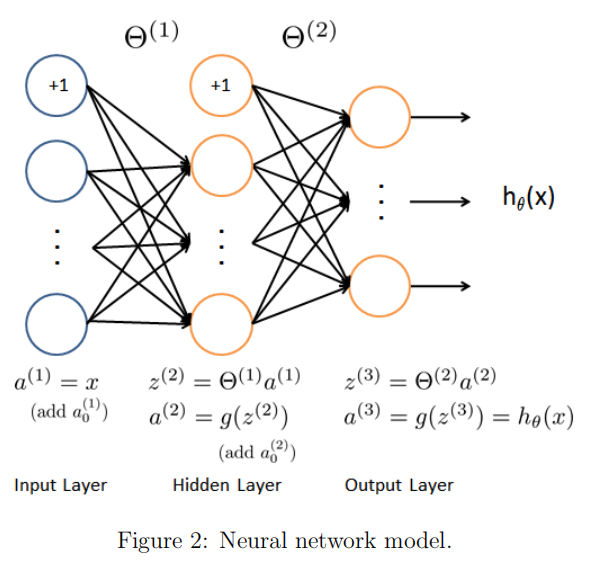

+ Since the images are of size 20×20, this gives us 400 input layer
units (excluding the extra bias unit which always outputs +1)
+ You have been provided with a set of network parameters (Θ(1)
, Θ(2))already trained by us. These are stored in `ex3weights.mat` . The parameters have dimensionsthat are sized for a neural network with 25 units in the second layer and 10 output units (corresponding to the 10 digit classes).

## 数据可视化

In [ ]:
def VisualizingData(X):
  index = np.random.choice(range(5000), 100)
  images = X[index]
  fig, ax = plt.subplots(10, 10, sharex=True, sharey=True, figsize=(8, 8))
  for r in range(10):
    for c in range(10):
      ax[r, c].matshow(images[r*10+c].reshape([20, 20]).T)
  plt.xticks([])
  plt.yticks([])
  plt.show()

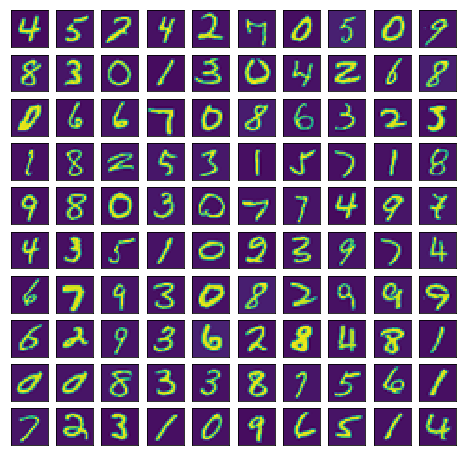

In [ ]:
VisualizingData(X)

## Sigmoid函数

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

## 线性函数

In [ ]:
def LinearFunction(X, theta):
  return theta @ X

## 前向传播并预测（Feedforward Propagation and Prediction）
m个样本的实现：m=5000

输入层：$A^{(1)}=X\ \ \ \ (add\ bias\ +1)$，其中$A^{(1)}\rightarrow (401, 5000)$

隐层1：$Z^{(2)}=\Theta^{(1)}A^{(1)},A^{(2)}=g(Z^{(2)})\ \ \ \ (add\ bias\ +1)$，其中$A^{(2)}\rightarrow (26, 5000)$

输出层：$Z^{(3)}=\Theta^{(2)}A^{(2)},A^{(3)}=g(Z^{(3)})$，其中$A^{(3)}\rightarrow (10, 5000)$

In [ ]:
def FeedforwardPropa(X, Theta1, Theta2):
  # 输入层
  A1 = (np.insert(X, 0, values=1, axis=1)).T # 401*5000
  # 隐层1
  Z2 = LinearFunction(A1, Theta1) # 25*5000
  A2 = sigmoid(Z2) # 25*5000
  A2 = np.insert(A2, 0, values=1, axis=0) # 26*5000
  # 输出层
  Z3 = LinearFunction(A2, Theta2) # 10*5000
  A3 = sigmoid(Z3) # 10*5000
  return A3

In [ ]:
y_probability = FeedforwardPropa(X, Theta1, Theta2)
y_probability.shape

(10, 5000)

## 将预测概率转化为分类结果$R^K$

In [ ]:
def TranslateResult(y_probability):
  y_trans = np.copy(y_probability)

  for i in range(y_probability.shape[1]):
    mmax = 0
    for j in range(y_probability.shape[0]):
      if y_probability[mmax][i] < y_probability[j][i]:
        y_trans[mmax][i] = 0
        mmax = j
      else:
        y_trans[j][i] = 0
    # 如果不进行处理，则会发生对应错误，
    if mmax == 9:
        y_trans[0][i] = 1
    else:
        y_trans[mmax + 1][i] = 1
    y_trans[mmax][i] = 0
  return y_trans

In [ ]:
y_hat = TranslateResult(y_probability)
y_hat

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

## 计算Accuracy
$$
Accuracy=\frac{Prediction\ Right}{Total}
$$

In [ ]:
def ComputeAccuracy(X, y, y_hat):
  m = X.shape[0]
  right = 0
  for i in range(y_hat.shape[1]):
    label = 0
    for j in range(y_hat.shape[0]):
      if y_hat[j][i] == 1:
        label = j
        if label == 0:
          label = 10
        break
    right += 1 if y[i] == label else 0

    # if y[i] == label:
    #   right += 1
    # else:
    #   print(i)
  accuracy = right / m
  return accuracy

In [ ]:
accuracy = ComputeAccuracy(X, y, y_hat)
print("Accuracy：", accuracy)

Accuracy： 0.9752


## 将训练集的y也转为分类结果$R^K$

In [ ]:
def TranslateY(y, K):
  # 注意这里，预测的时候0标签在y_hat里下标为9，1-9标签在y_hat里下标为0-8
  # 因此要将y中的标签位置和y_hat对应，y中的10对应下标为9，1-9对应下标0-8
  m = y.shape[0]
  y_trans = np.zeros([K, m])
  for i in range(m):
      y_trans[y[i,0]-1, i] = 1

  return y_trans

## 代价函数
<font color='red'>**h_θ(x)为概率值，不要取最大值的后处理**</font>


公式：
$$
J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}[-y_k^{(i)}\log((h_\theta(x^{(i)}))_k)-(1-y_k^{(i)})\log(1-(h_\theta(x^{(i)}))_k)]   
$$

***
向量化实现公式（<font color='red'>**公式推导有问题，还是采用循环的方式编写代码**</font>）

前置：
$y^{(i)}\in [0,9] \Rightarrow 
y^{(i)}=\begin{bmatrix}
y^{(i)}_1 \\
y^{(i)}_2 \\
\vdots \\
y^{(i)}_K
\end{bmatrix}_{10\times 1}$

公式：
$$
\begin{aligned}
J(\theta)=\frac{1}{m}\sum_{i=1}^{m}
\left \{ [-y_1^{(i)}\log((h_\theta(x^{(i)}))_1)-(1-y_1^{(i)})\log(1-(h_\theta(x^{(i)}))_1)] \\
+[-y_2^{(i)}\log((h_\theta(x^{(i)}))_2)-(1-y_2^{(i)})\log(1-(h_\theta(x^{(i)}))_2)] \\
+... \\
+[-y_K^{(i)}\log((h_\theta(x^{(i)}))_K)-(1-y_K^{(i)})\log(1-(h_\theta(x^{(i)}))_K)]   \right \} 
\end{aligned}
$$

由于：
$y^{(i)}=\begin{bmatrix}
y^{(i)}_1 \\
y^{(i)}_2 \\
\vdots \\
y^{(i)}_K
\end{bmatrix}_{K\times 1}$，
$h_\theta(x^{(i)})=\begin{bmatrix}
h_\theta(x^{(i)})_1 \\
h_\theta(x^{(i)})_2 \\
\vdots \\
h_\theta(x^{(i)})_K
\end{bmatrix}_{K\times 1}$

即公式可变为：
$$
\begin{aligned}
J(\theta) &=-\frac{1}{m}\sum_{i=1}^{m}[(y^{(i)})^T\log(h_\theta(x^{(i)}))+(1-y^{(i)})^T\log(1-(h_\theta(x^{(i)})))] \\
&=-\frac{1}{m} \{ [(y^{(1)})^T\log(h_\theta(x^{(1)}))+(1-y^{(1)})^T\log(1-(h_\theta(x^{(1)})))] \\
&+[(y^{(2)})^T\log(h_\theta(x^{(2)}))+(1-y^{(2)})^T\log(1-(h_\theta(x^{(2)})))] \\
&+... \\
&+[(y^{(m)})^T\log(h_\theta(x^{(m)}))+(1-y^{(m)})^T\log(1-(h_\theta(x^{(m)})))]  \} \\
&=-\frac{1}{m} \{[(y^{(1)})^T\log(h_\theta(x^{(1)}))+(y^{(2)})^T\log(h_\theta(x^{(2)}))+...+(y^{(m)})^T\log(h_\theta(x^{(m)}))] \\
&+(1-y^{(1)})^T\log(1-(h_\theta(x^{(1)})))+(1-y^{(2)})^T\log(1-(h_\theta(x^{(2)})))+...+(1-y^{(m)})^T\log(1-(h_\theta(x^{(m)})))] \}
\end{aligned}
$$

又：
$y=
\begin{bmatrix}
y^{(1)}_1  & y^{(2)}_1 & ... & y^{(m)}_1\\
y^{(1)}_2  & y^{(2)}_2 & ... & y^{(m)}_2\\
\vdots  & \vdots & \vdots & \\ \vdots
y^{(1)}_K  & y^{(m)}_K & ... & y^{(m)}_K
\end{bmatrix}_{K\times m}=\begin{bmatrix}
y^{(1)}  & y^{(2)} & ... & y^{(m)}
\end{bmatrix}$，
$h_\theta(X)=
\begin{bmatrix}
h_\theta(x^{(1)})_1  & h_\theta(x^{(2)})_1 & ... & h_\theta(x^{(m)})_1\\
h_\theta(x^{(1)})_2  & h_\theta(x^{(2)})_2 & ... & h_\theta(x^{(m)})_2\\
\vdots  & \vdots & \vdots & \\ \vdots
h_\theta(x^{(1)})_K  & h_\theta(x^{(2)})_K & ... & h_\theta(x^{(m)})_K
\end{bmatrix}_{K\times m}=\begin{bmatrix}
h_\theta(x^{(1)})  & h_\theta(x^{(2)}) & ... & h_\theta(x^{(m)})
\end{bmatrix}$

最终公式为：
$$
J(\theta)=-\frac{1}{m} \{ np.sum(\log(h_\theta(X))y^T)+np.sum(\log(1-h_\theta(X))(1-y)^T) \}$$

In [ ]:
# def ComputeCost(X, y, Theta1, Theta2):
#   m = X.shape[0]
#   y_hat = FeedforwardPropa(X, Theta1, Theta2) # K*m
#   # 注意这里，预测的时候0标签在y_hat里下标为9，1-9标签在y_hat里下标为0-8
#   # 因此要将y中的标签位置和y_hat对应，y中的10对应下标为9，1-9对应下标0-8
#   y_trans = TranslateY(y, 10) # K*m

#   return -1 * (np.sum(np.log(y_hat) @ y_trans.T) + np.sum(np.log(1-y_hat) @ (1-y_trans).T)) / m
  
# ComputeCost(X, y, Theta1, Theta2)

In [ ]:
def ComputeCost(X, y, Theta1, Theta2):
  m = X.shape[0]
  K = 10
  y_hat = FeedforwardPropa(X, Theta1, Theta2)  # K*m
  # 注意这里，预测的时候0标签在y_hat里下标为9，1-9标签在y_hat里下标为0-8
  # 因此要将y中的标签位置和y_hat对应，y中的10对应下标为9，1-9对应下标0-8
  y_trans = TranslateY(y, 10)  # K*m

  cost = 0.0
  for i in range(m):
    temp = 0
    for k in range(K):
      temp = temp + y_trans[k][i] * np.log(y_hat[k][i]) + (1 - y_trans[k][i]) * np.log(1 - y_hat[k][i])
    cost = cost + temp
  cost = -1 * cost / m
  return cost

In [ ]:
ComputeCost(X, y, Theta1, Theta2)

0.2876291651613188

## 正则化的代价函数
公式：
$$
J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}[-y_k^{(i)}\log((h_\theta(x^{(i)}))_k)-(1-y_k^{(i)})\log(1-(h_\theta(x^{(i)}))_k)]  +\frac{\lambda }{2m}\left [ \sum_{j=1}^{25} \sum_{k=1}^{400} (\Theta_{j,k}^{(1)})^2 + \sum_{j=1}^{10} \sum_{k=1}^{25} (\Theta_{j,k}^{(2)})^2 \right ] 
$$

In [ ]:
def ComputeThetaReg(J, K, Theta):
  ret = 0
  for j in range(J):
    for k in range(K):
      ret += Theta[j, k] * Theta[j, k]
  return ret
  
def ComputeCostReg(X, y, Theta1, Theta2, lambd):
  m = X.shape[0]
  K = 10
  y_hat = FeedforwardPropa(X, Theta1, Theta2)  # K*m
  # 注意这里，预测的时候0标签在y_hat里下标为9，1-9标签在y_hat里下标为0-8
  # 因此要将y中的标签位置和y_hat对应，y中的10对应下标为9，1-9对应下标0-8
  y_trans = TranslateY(y, 10)  # K*m

  cost = 0.0
  for i in range(m):
    temp = 0
    for k in range(K):
      temp += y_trans[k][i] * np.log(y_hat[k][i]) + (1 - y_trans[k][i]) * np.log(1 - y_hat[k][i])
    cost += temp
  cost = -1 * cost / m
  cost += lambd / (2 * m) * (ComputeThetaReg(25, 400, Theta1) + ComputeThetaReg(10, 25, Theta2))
  return cost

In [ ]:
lambd = 1

ComputeCostReg(X, y, Theta1, Theta2, lambd)

0.38181289642692073

# 反向传播

## sigmoid函数的梯度
公式：
$$
g'(z)=\frac{\partial g(z)}{\partial z}=g(z)[1-g(z)]
$$

In [ ]:
def sigmoidGradient(z):
  return sigmoid(z) * (1 - g(z))

## 随机初始化
+  One effective strategy for random initialization is to randomly select values for Θ(l) uniformly in the range $[−\epsilon_{init}, \epsilon_{init}]$.
You should use $\epsilon_{init} = 0.12$

In [ ]:
epsilon = 0.12
def randomInitialization(m, n, epsilon):
  ret = np.random.uniform(-epsilon, epsilon, (m, n))
  return ret

In [ ]:
theta1 = randomInitialization(25, 401, epsilon)
theta2 = randomInitialization(10, 26, epsilon)

## 计算误差
定义单样本误差为：
$$
E=\frac{1}{2}\sum_{i=1}^{S_L}(a_i^{(L)}-y_i)^2=\frac{1}{2}[(a_1^{(L)}-y_1)^2+(a_2^{(L)}-y_2)^2+...+(a_{S_L}^{(L)}-y_{S_L})^2]=\frac{1}{2}np.sum((a^{(L)}-y)^T(a^{(L)}-y))
$$
定义：第l层的第j个结点的误差
$$
\frac{\partial E}{\partial Z_j^{(l)}}=\delta_j^{(l)}
$$

***
实现公式

输出层误差公式：
$$
\delta_j^{(L)}=\frac{\partial E}{\partial Z_j^{(L)}}=(a_j^{(L)}-y_j)g'(Z_j^{(L)})
$$
向量化：
$$
\delta^{(L)}=
\begin{bmatrix}
\delta_1^{(L)} \\
\delta_2^{(L)} \\
\vdots \\
\delta_{S_L}^{(L)}
\end{bmatrix}
=
\begin{bmatrix}
\frac{\partial E}{\partial Z_1^{(L)}} \\
\frac{\partial E}{\partial Z_2^{(L)}} \\
\vdots \\
\frac{\partial E}{\partial Z_{S_L}^{(L)}}
\end{bmatrix}
=
\begin{bmatrix}
(a_1^{(L)}-y_1)g'(Z_1^{(L)}) \\
(a_2^{(L)}-y_2)g'(Z_2^{(L)}) \\
\vdots \\
(a_{S_L}^{(L)}-y_{S_L})g'(Z_{S_L}^{(L)})
\end{bmatrix}
=(a^{(L)}-y)\odot g'(Z^{(L)})
$$

其中：$\delta^{(L)}$为$S_L\times 1$维

隐藏层误差公式：
$$
\delta_j^{(l)}=\frac{\partial E}{\partial Z_j^{(l)}}=\sum_{i=1}^{S_{L+1}}(\delta_i^{(l+1)}\theta _{ij}^{(l)})g'(Z_j^{(l)})
$$
向量化：
$$
\delta^{(l)}=
\begin{bmatrix}
\delta_1^{(l)} \\
\delta_2^{(l)} \\
\vdots \\
\delta_{S_l}^{(l)}
\end{bmatrix}
=
\begin{bmatrix}
\frac{\partial E}{\partial Z_1^{(l)}} \\
\frac{\partial E}{\partial Z_2^{(l)}} \\
\vdots \\
\frac{\partial E}{\partial Z_{S_l}^{(l)}}
\end{bmatrix}
=(\Theta^{(l)})^T\delta^{(l+1)}\odot g'(Z^{(l)})
$$

其中：$\delta^{(l)}$为$S_l\times 1$维

In [ ]:
def ComputeError(X, y, theta1, theta2):
  # 输入层
  A1 = (np.insert(X, 0, values=1, axis=1)).T # 401*5000
  # 隐层1
  Z2 = LinearFunction(A1, theta1) # 25*5000
  A2 = sigmoid(Z2) # 25*5000
  A2_insert = np.insert(A2, 0, values=1, axis=0) # 26*5000
  # 输出层
  Z3 = LinearFunction(A2_insert, theta2) # 10*5000
  A3 = sigmoid(Z3) # 10*5000

  y_trans = TranslateY(y, 10)
  error3 = (A3 - y) * sigmoidGradient(Z3)
  error2 = (theta2.T @ error3) * sigmoidGradient(Z2)

  return error2, error3

In [ ]:
error2, error3 = ComputeError(X, y, theta1, theta2)

ValueError: ignored

## 计算梯度
实现公式：
$$
\frac{\partial E}{\partial \theta_{ji}^{(l)}}=\delta_j^{(l+1)}a_i^{(l)}
$$

$$
\frac{\partial E}{\partial b_{j}^{(l)}}=\delta_j^{(l+1)}
$$

In [ ]:
def ComputeGradient(X, y, theta1, theta2, error, i, j, l):
  y_probability = FeedforwardPropa(X, theta1, theta2)

## 随机梯度下降
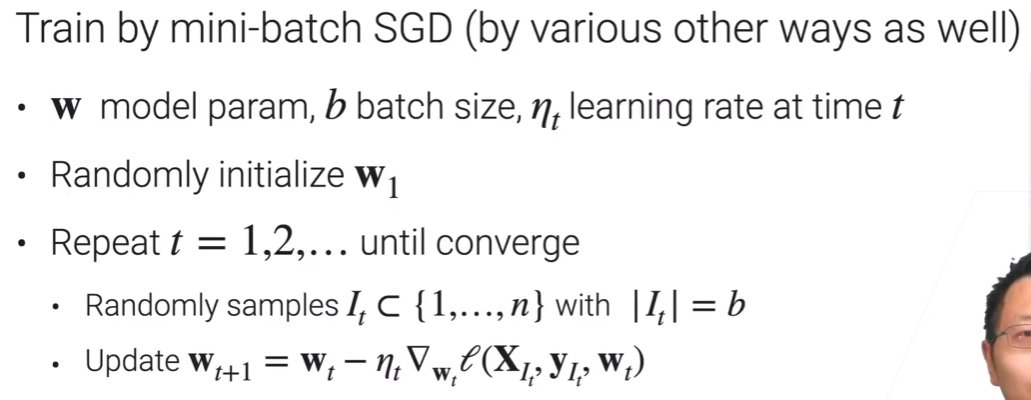